In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.api import ApiClient
from src.utils import *
from src.const import *

%load_ext autoreload
%autoreload 2

sns.set_theme(style="darkgrid")

In [13]:
client = ApiClient()

In [14]:
client.create(
    [
        client.make_msg(
            "You are image descripto. Respond with json of this format: {'description': what you see, 'style': stylistics of the image}",
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            "What's in this image?",
            get_image_url(
                "https://cdn.midjourney.com/ca13f713-b289-45ee-92fe-b1276a1dc833/0_3.webp"
            ),
        ),
    ],
    format=JSON_MODE,
)

'{\n  "description": "This is an image of a fictional character, a young woman with long, flowing red hair and striking blue eyes. She is wearing a black bikini and is posing with her arms raised over her head. The background is a simple, flat light blue, emphasizing the character.",\n  "style": "The image is rendered in a digital art style, featuring vibrant colors and smooth, detailed textures that give a lively and dynamic appearance."\n}'

'{\n  "description": "The image shows a sinusoidal wave pattern plotted on a graph. The X-axis is labeled with numbers ranging from 0 to 300 and the Y-axis scales from -1 to 1. The wave oscillates regularly between these Y-axis values throughout the X-axis range.",\n  "style": "The graph features a simple and clear design with a blue wave against a grid background. The axes are properly marked and the overall visualization is neat and easy to interpret."\n}'

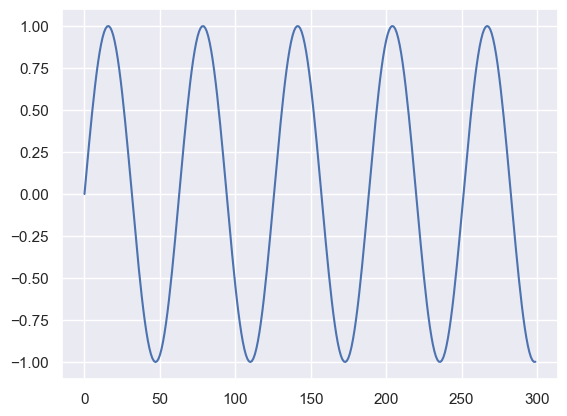

In [20]:
plt.plot(np.sin(np.array(range(300)) * 0.1))

client.create(
    [
        client.make_msg(
            "You are image descripto. Respond with json of this format: {'description': what you see, 'style': stylistics of the image}",
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            "What's in this image?",
            get_image_url(plt_to_base64(plt, False)),
        ),
    ],
    format=JSON_MODE,
)

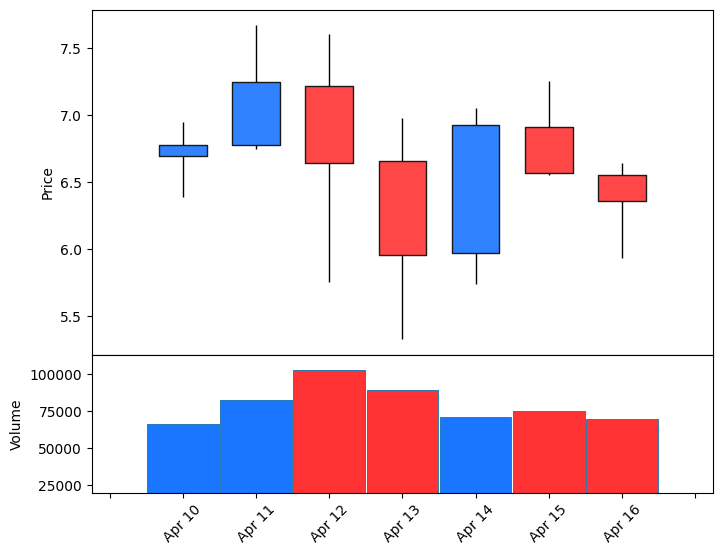

In [23]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
from datetime import datetime

# Your data
data = {
    "candles": [
        {
            "t": 1712707200000,
            "o": 6.694631,
            "c": 6.775634,
            "h": 6.95,
            "l": 6.3853,
            "v": 66603.31181208
        },
        {
            "t": 1712793600000,
            "o": 6.776413,
            "c": 7.246192,
            "h": 7.667442,
            "l": 6.747201,
            "v": 82553.69898804
        },
        {
            "t": 1712880000000,
            "o": 7.218322,
            "c": 6.639205,
            "h": 7.599796,
            "l": 5.757584,
            "v": 102750.81215971
        },
        {
            "t": 1712966400000,
            "o": 6.655751,
            "c": 5.953102,
            "h": 6.98,
            "l": 5.33,
            "v": 89523.41695677
        },
        {
            "t": 1713052800000,
            "o": 5.972534,
            "c": 6.921351,
            "h": 7.054943,
            "l": 5.738357,
            "v": 70932.88775303
        },
        {
            "t": 1713139200000,
            "o": 6.910316,
            "c": 6.565912,
            "h": 7.251101,
            "l": 6.555082,
            "v": 75039.00913975
        },
        {
            "t": 1713225600000,
            "o": 6.555,
            "c": 6.354836,
            "h": 6.642486,
            "l": 5.9354,
            "v": 69959.39030372
        }
    ]
}

# Transforming data into a DataFrame
df = pd.DataFrame(data["candles"])
df["Date"] = pd.to_datetime(df["t"], unit="ms")  # Convert timestamp to datetime
df.set_index("Date", inplace=True)  # Set the datetime as index
df.drop(columns=["t"], inplace=True)  # Drop the old timestamp column

# The columns need to be in a specific order for mplfinance
df = df[["o", "h", "l", "c", "v"]]
df.columns = ["Open", "High", "Low", "Close", "Volume"]  # Renaming for clarity

# Creating a custom style
mc = mpf.make_marketcolors(
    up="#1a75ff",
    down="#ff3333",
    wick="black",
    volume="in",
    ohlc="i",
)
s = mpf.make_mpf_style(base_mpl_style="seaborn-v0_8-pastel", marketcolors=mc)

# Plotting candlestick chart with the custom style
mpf.plot(
    df,
    type="candle",
    style=s,
    ylabel="Price",
    volume=True,
    ylabel_lower="Volume",
    figratio=(10, 8),
    figscale=1.2,
)

plt.show()

In [15]:
from src.signal_providers.exmo_signal_provider import ExmoProvider

provider = ExmoProvider()
provider.get_history("TON", start_date=1712707200, end_date=1713229200, resolution="D")

{'candles': [{'t': 1712707200000,
   'o': 6.694631,
   'c': 6.775634,
   'h': 6.95,
   'l': 6.3853,
   'v': 66603.31181208},
  {'t': 1712793600000,
   'o': 6.776413,
   'c': 7.246192,
   'h': 7.667442,
   'l': 6.747201,
   'v': 82553.69898804},
  {'t': 1712880000000,
   'o': 7.218322,
   'c': 6.639205,
   'h': 7.599796,
   'l': 5.757584,
   'v': 102750.81215971},
  {'t': 1712966400000,
   'o': 6.655751,
   'c': 5.953102,
   'h': 6.98,
   'l': 5.33,
   'v': 89523.41695677},
  {'t': 1713052800000,
   'o': 5.972534,
   'c': 6.921351,
   'h': 7.054943,
   'l': 5.738357,
   'v': 70932.88775303},
  {'t': 1713139200000,
   'o': 6.910316,
   'c': 6.565912,
   'h': 7.251101,
   'l': 6.555082,
   'v': 75039.00913975},
  {'t': 1713225600000,
   'o': 6.555,
   'c': 6.354836,
   'h': 6.642486,
   'l': 5.9354,
   'v': 69959.39030372}]}